In [18]:
# Input signal parameters
f = 10      # signal frequency (Hz)
A = 10       # signal amplitude
t_end = 1   # signal duration (seconds)

# Quantization parameters
n_bits = 8  # number of bits
Vmin = -1   # minimum voltage
Vmax = 1    # maximum voltage

# Sampling parameters
fs = 100    # sampling frequency (Hz)

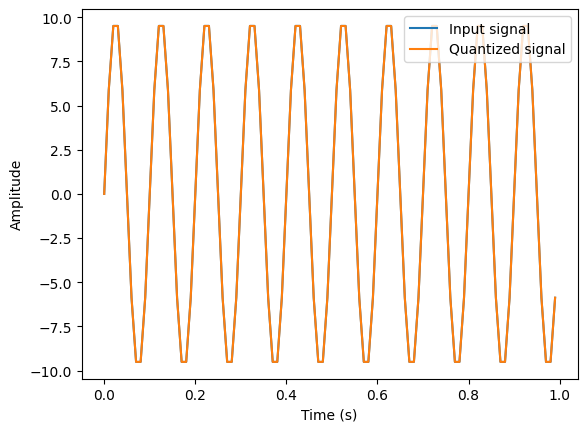

In [19]:
# Import the NumPy library
import numpy as np

# Define the time axis
t = np.arange(0, t_end, 1/fs)

import matplotlib.pyplot as plt

# Generate the input signal
x = A*np.sin(2*np.pi*f*t)

# Quantize the input signal
Q = (Vmax - Vmin) / (2 ** n_bits)
y = np.round(x / Q) * Q


plt.figure()
plt.plot(t, x, label='Input signal')
plt.plot(t, y, label='Quantized signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

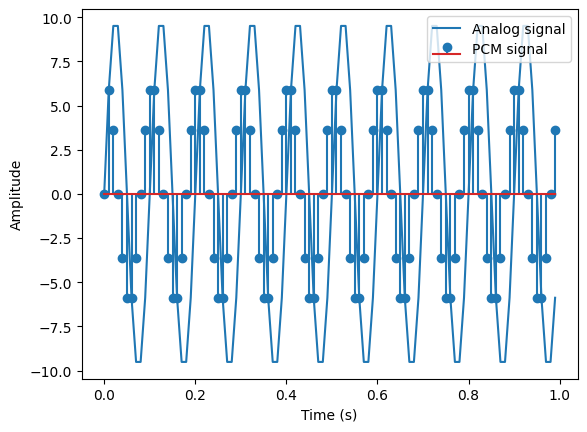

In [20]:
# Perform DPCM
dpcm_signal = np.zeros(len(x))
dpcm_signal[0] = x[0]
for i in range(1, len(x)):
    dpcm_signal[i] = x[i] - x[i-1]
    
# Plot the input and output signals for PCM
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, x, label='Analog signal')
plt.stem(t, dpcm_signal, label='PCM signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

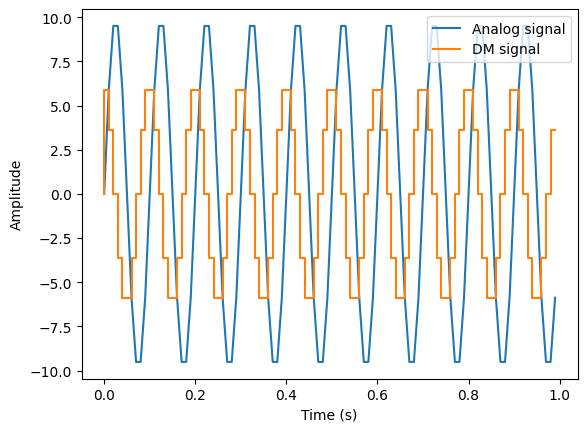

In [21]:
# Perform DM
dm_signal = np.zeros(len(x))
dm_signal[0] = x[0]
for i in range(1, len(x)):
    dm_signal[i] = x[i] - x[i-1]
    
# Plot the input and output signals for DM
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, x, label='Analog signal')
plt.step(t, dm_signal, label='DM signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()